### Disclaimer
This notebook is purely meant as a tutorial for the purposes of plotting the direct results from RENAISSANCE and downstream studies. A toy dataset was used to create these plots. The toy dataset was generated from an unoptimised generator and should not be scrutinised for validation in accordance with the manuscript plots and data. 

## Plot incidence

In [20]:
import helper as hp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [21]:
path_to_folder = 'output/rnsc_opt/'
n_repeats = 1
n_generations = 25


all_rewards = []
for rep in range(n_repeats):
    all_rewards.append(hp.load_pkl(f'{path_to_folder}repeat_{rep}/rewards'))

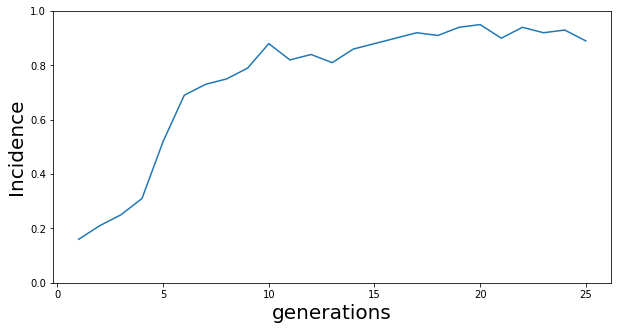

In [22]:
plt.figure(figsize = (10,5))
for j in range(n_repeats):
    plt.plot(np.arange(1,n_generations+1), np.array(all_rewards[j]))
plt.ylim([0,1])
plt.xlabel('generations', fontsize = 20)
plt.ylabel('Incidence', fontsize = 20)
plt.show()

## Statistics on eigenvalues

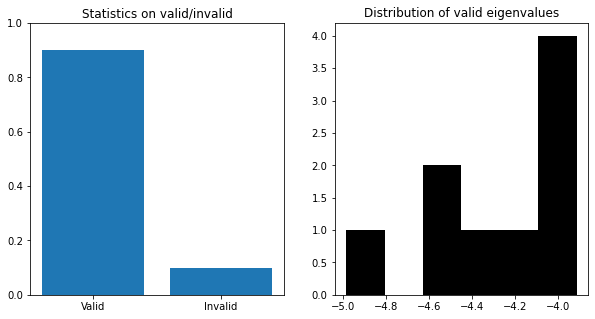

In [54]:
path_to_eigenvalues = 'output/toy_data/gen_x_parameters_max_eig.csv'
max_eigs = pd.read_csv(path_to_eigenvalues).iloc[:,1].values
n_sets = len(max_eigs)
# FIlter out non-valid models
neg_max_eigs = max_eigs[np.where(max_eigs<=-2.5)[0]]
n_valid = len(neg_max_eigs)
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.title('Statistics on valid/invalid')
plt.bar([0,1], [n_valid/n_sets, (n_sets-n_valid)/n_sets])
plt.ylim([0,1])
plt.xticks([0,1], ['Valid', 'Invalid'])
plt.subplot(122)
plt.title('Distribution of valid eigenvalues')
plt.hist(neg_max_eigs, bins = 6, color = 'k')
plt.show()

## Plot non linear simulations

Plot one component of steady state (e.g: normalized biomass flux)

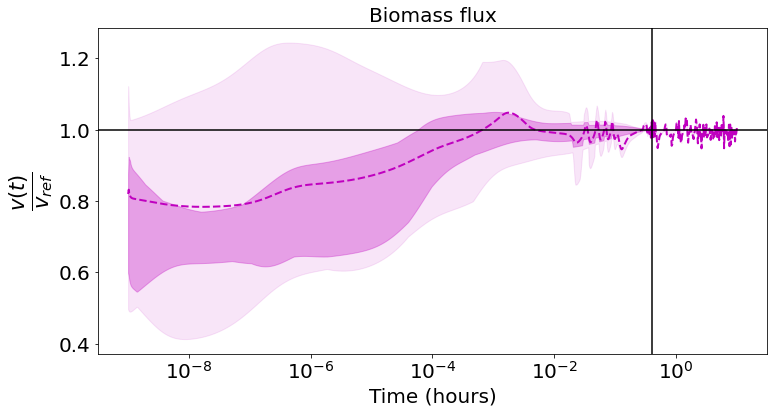

In [63]:
path_to_folder = f'output/toy_data/ode_output/gen_x_parameters/'
n_sets = 10
ss_idx = 1712
path_to_ss_samples = 'models/varma_ecoli_shikki/steady_state_samples/steady_states.csv'
all_ss = pd.read_csv(path_to_ss_samples)
ss = all_ss.iloc[1712]

ref_flux_id = 'LMPD_biomass_c_1_420'
ref_flux = ss[ref_flux_id]
all_biomass = []
for idx in range(n_sets):
    
    fluxes = pd.read_csv(f'{path_to_folder}fluxes_{idx}.csv')
    biomass_flx = fluxes[ref_flux_id].values
    
    biomass_flx = biomass_flx/ref_flux
    all_biomass.append(biomass_flx)

all_biomass = np.array(all_biomass)

plt.figure(figsize = (12,6))

plt.plot(np.logspace(-9, 1, 1000), np.mean(all_biomass, axis = 0), color = 'm', ls = '--', lw = 2)
plt.fill_between(np.logspace(-9, 1, 1000),
                 np.percentile(all_biomass,10, axis = 0),
                 np.percentile(all_biomass,90, axis = 0), color= 'm', alpha = 0.1)
plt.fill_between(np.logspace(-9, 1, 1000),
                 np.percentile(all_biomass,25, axis = 0),
                 np.percentile(all_biomass,75, axis = 0), color= 'm', alpha = 0.3)
plt.title('Biomass flux', fontsize =20)
plt.axvline(x = 24/60, color = 'k')
plt.axhline(y = 1, color = 'k')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel(r'$\frac{v(t)}{v_{ref}}$', fontsize = 30)
plt.xscale('log')

Plot temporal evolution of all metabolite concentrations

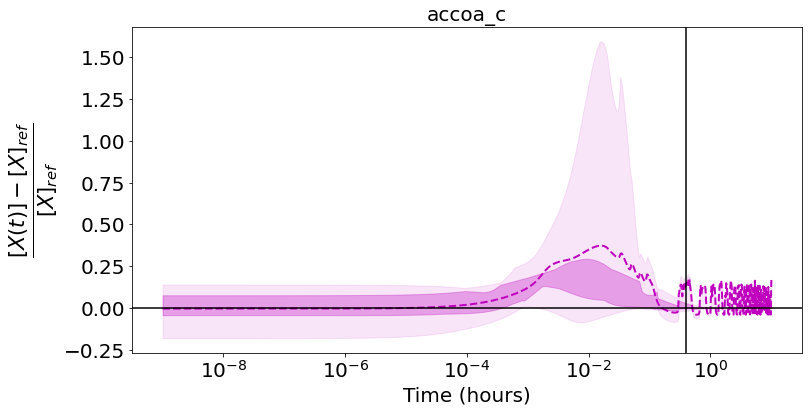

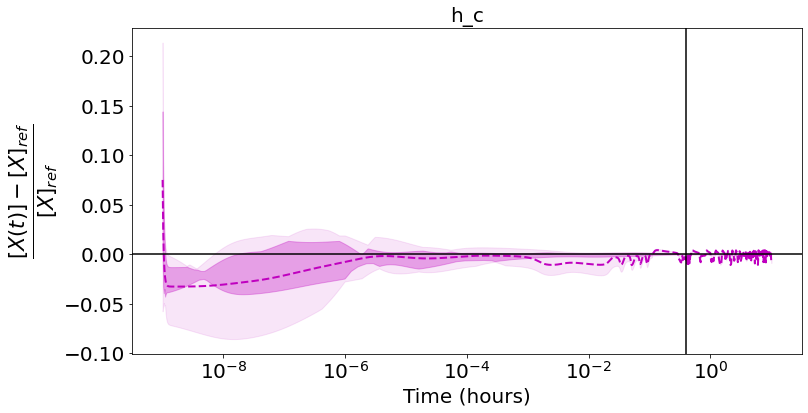

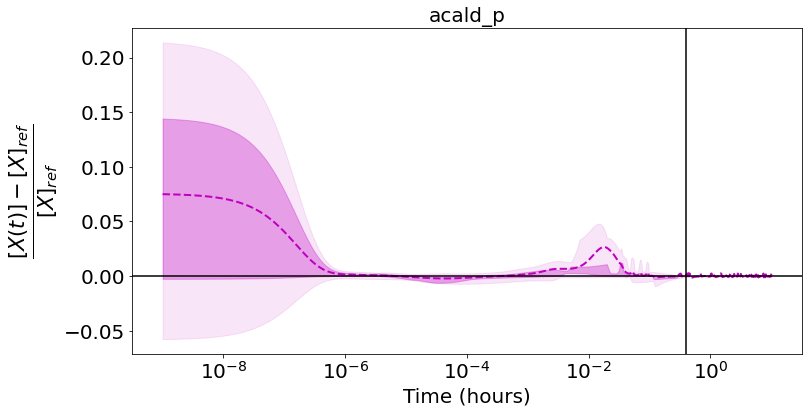

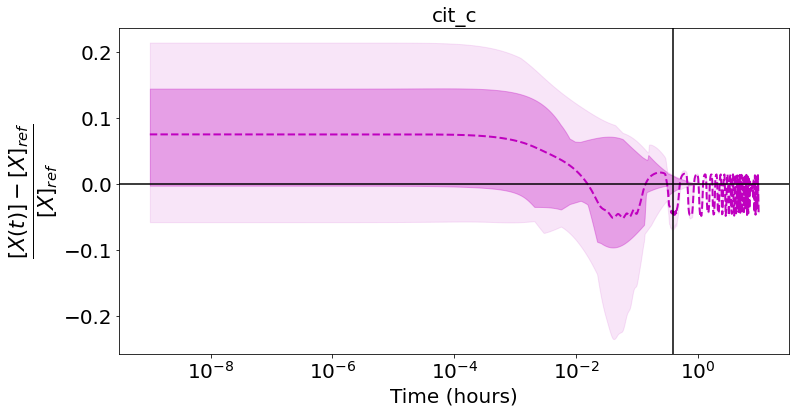

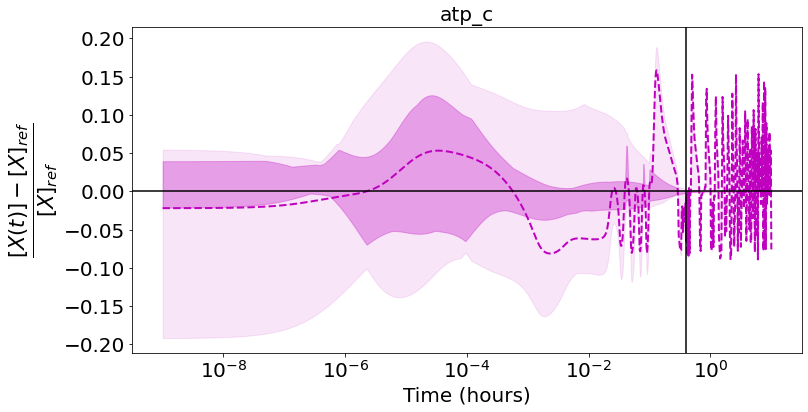

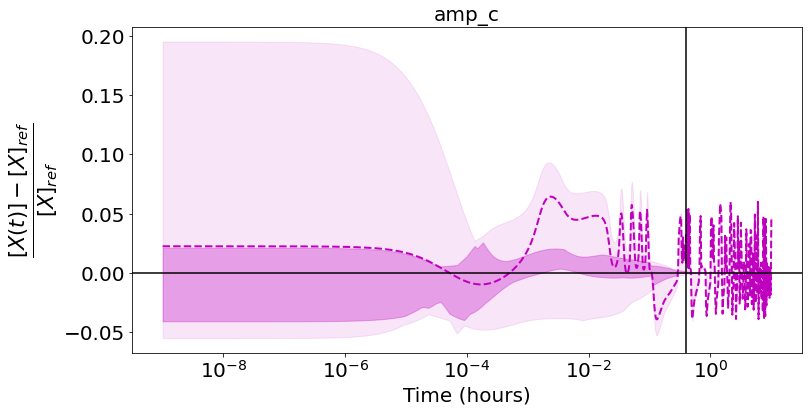

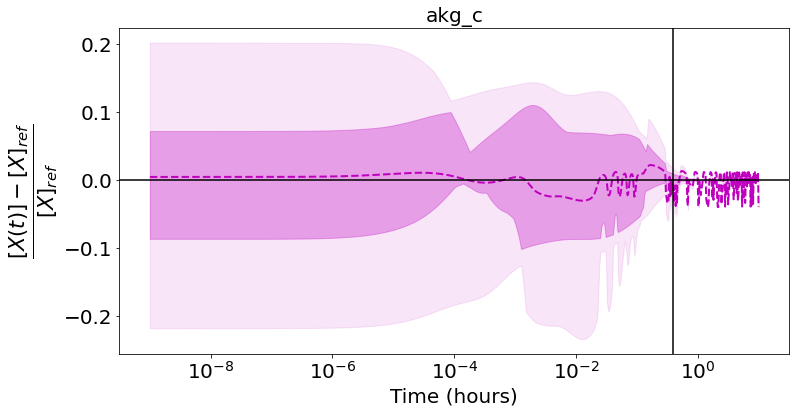

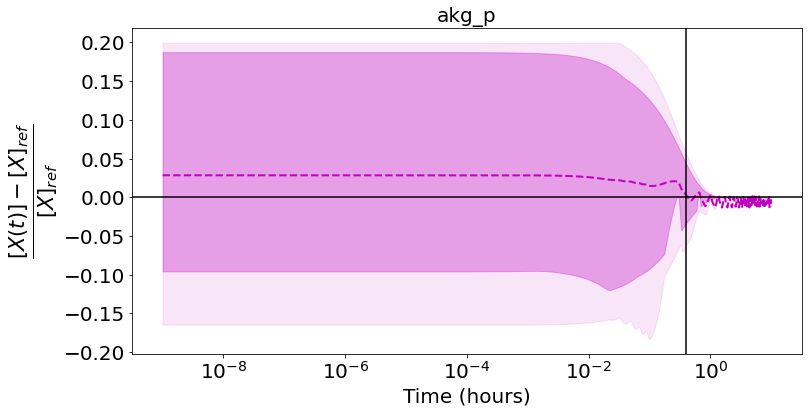

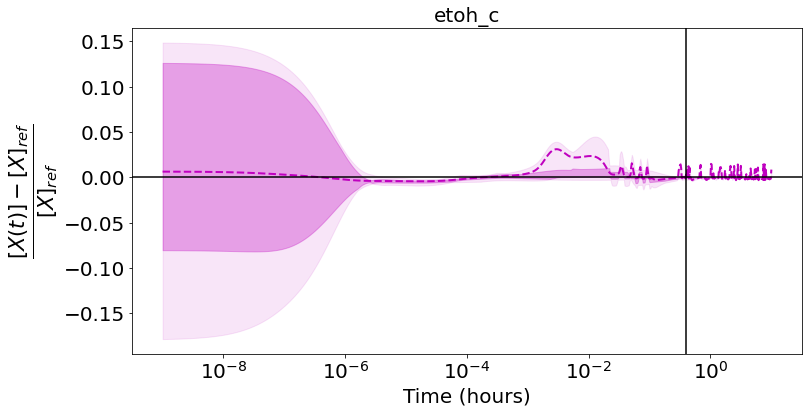

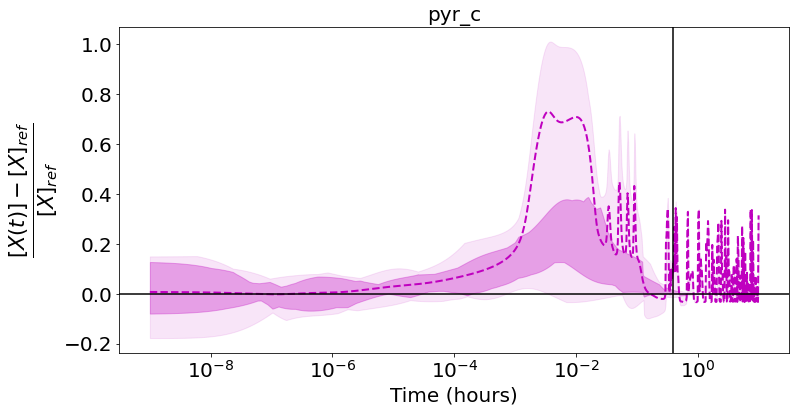

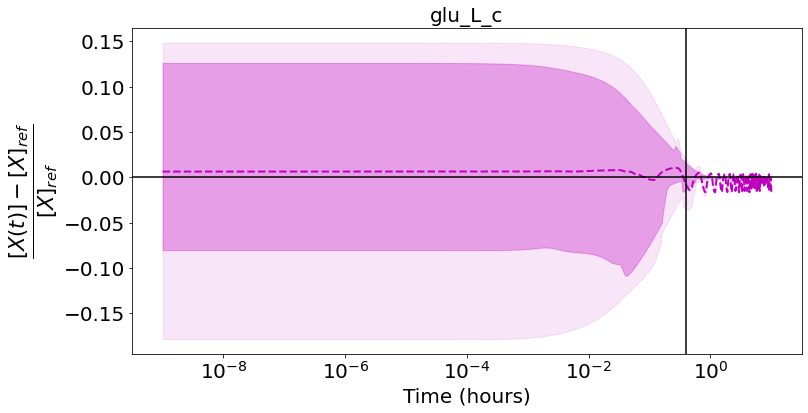

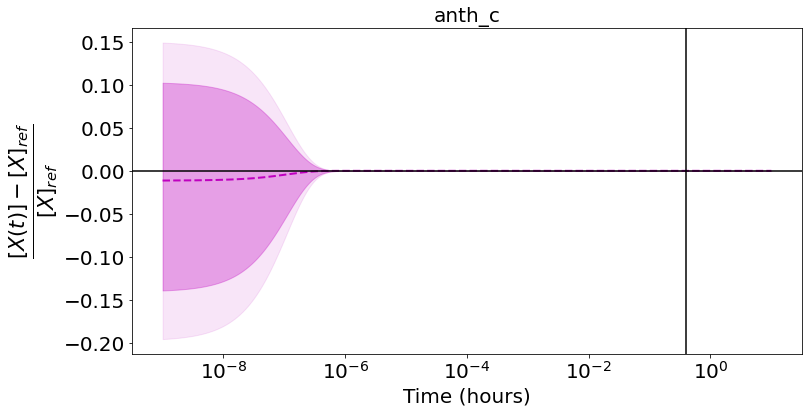

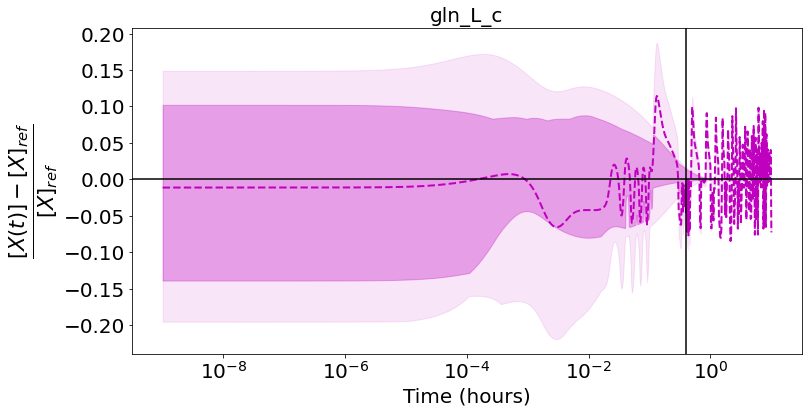

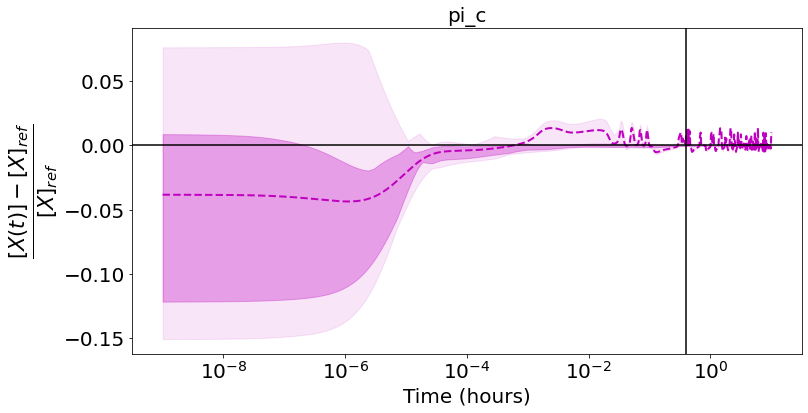

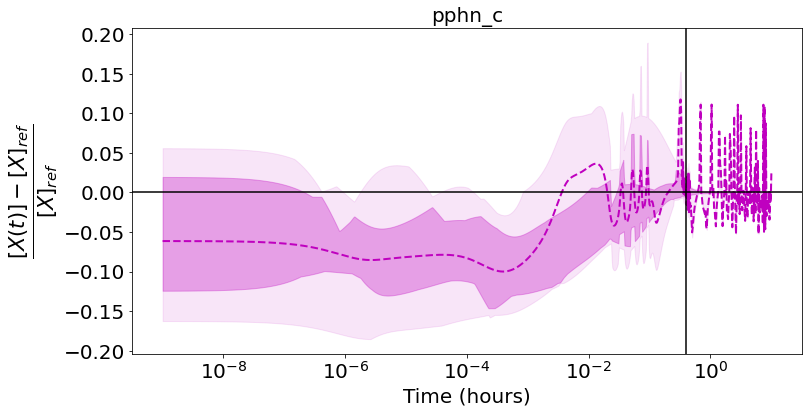

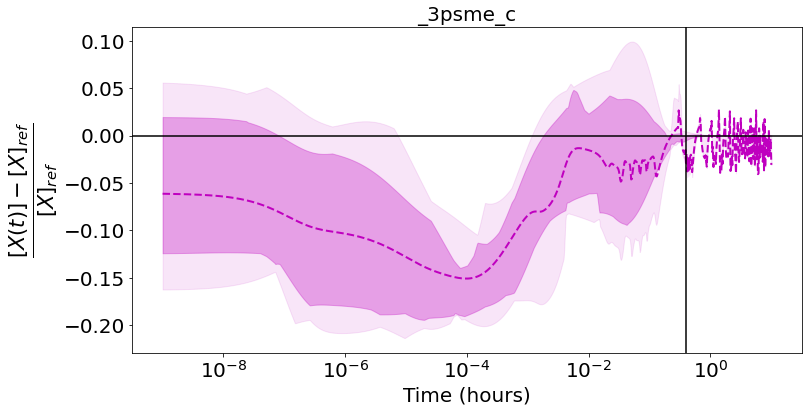

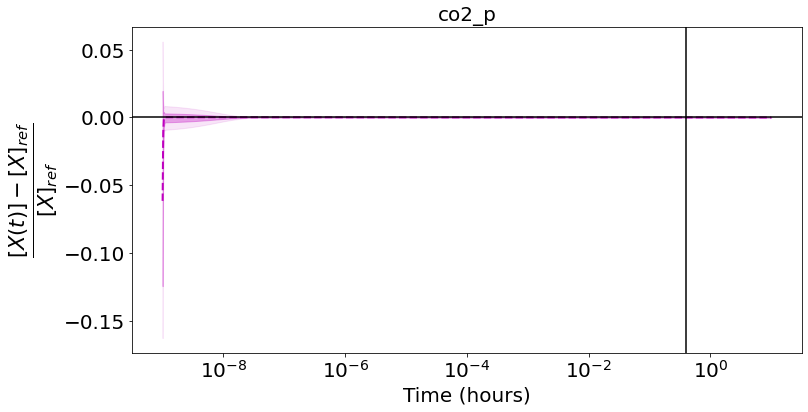

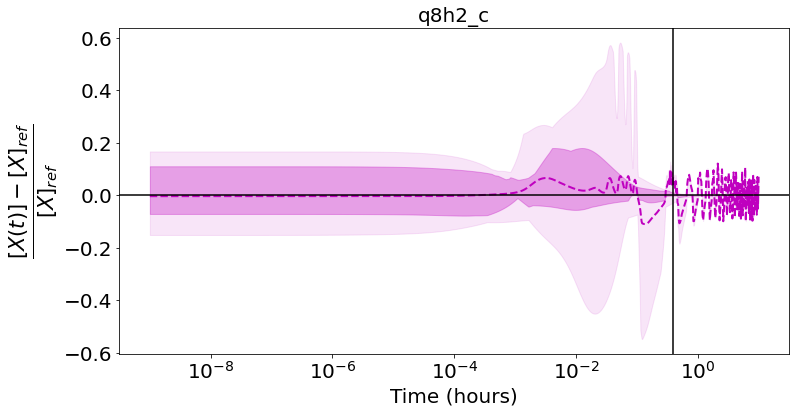

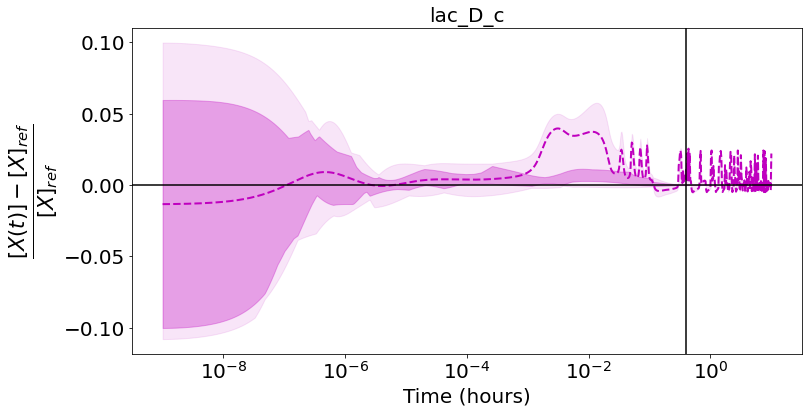

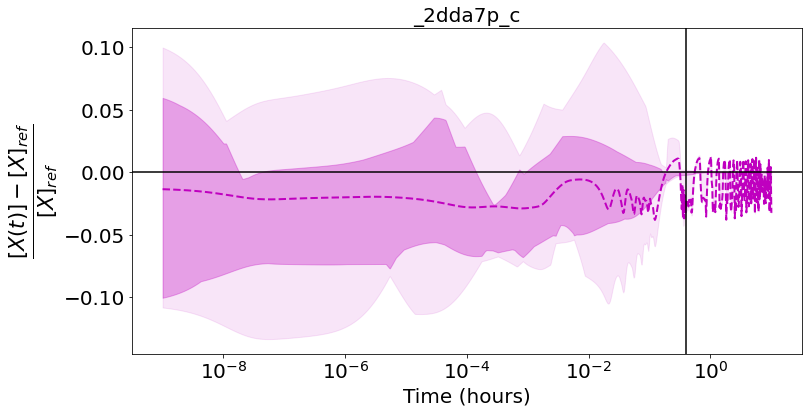

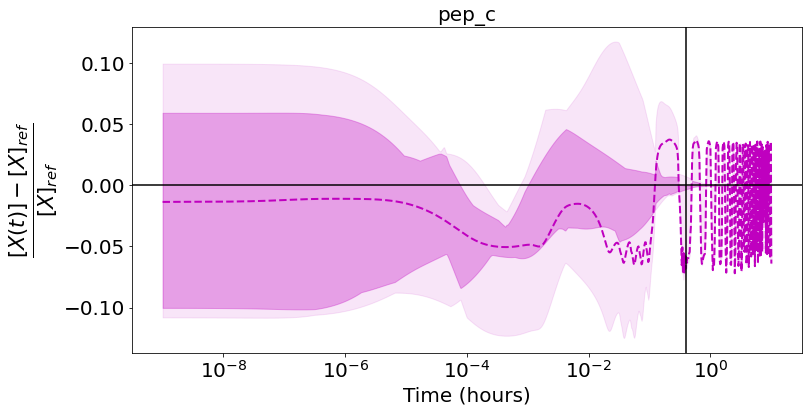

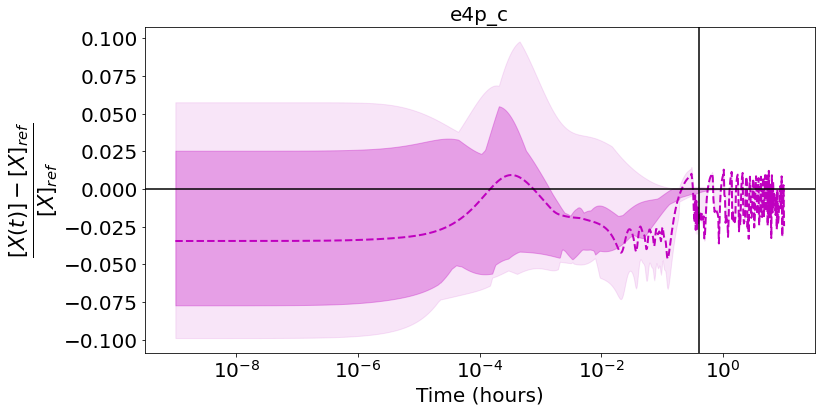

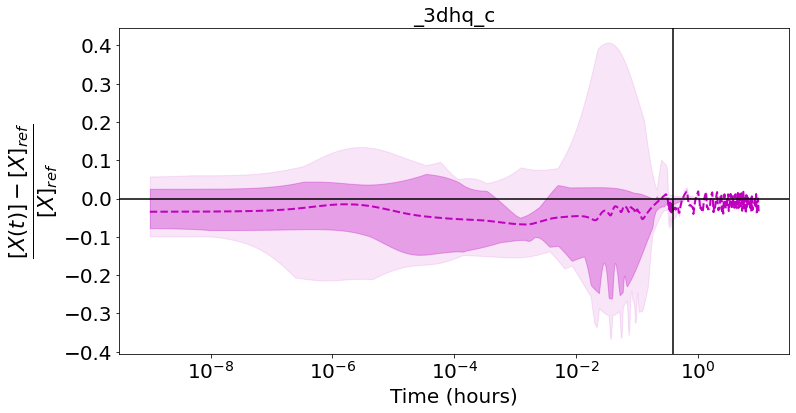

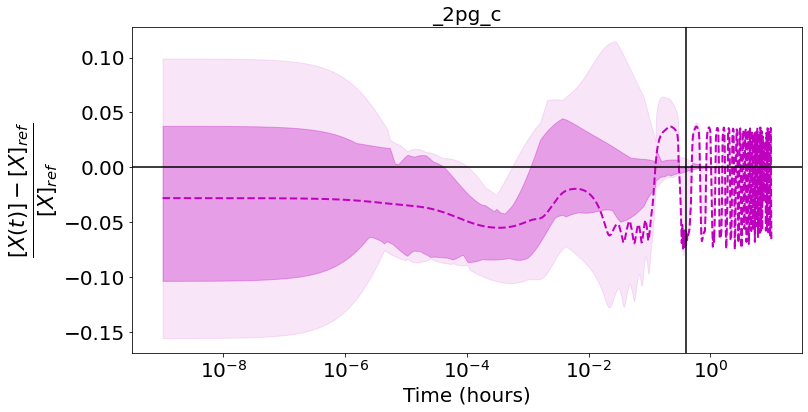

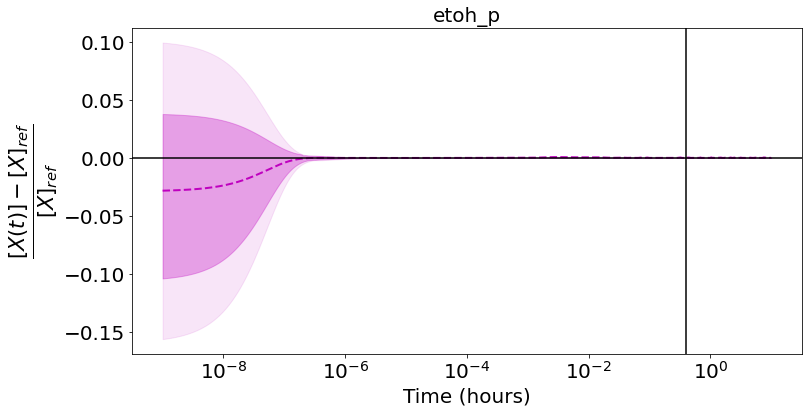

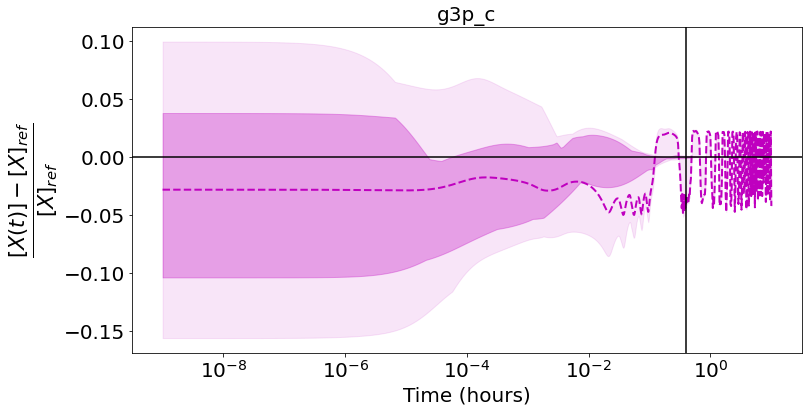

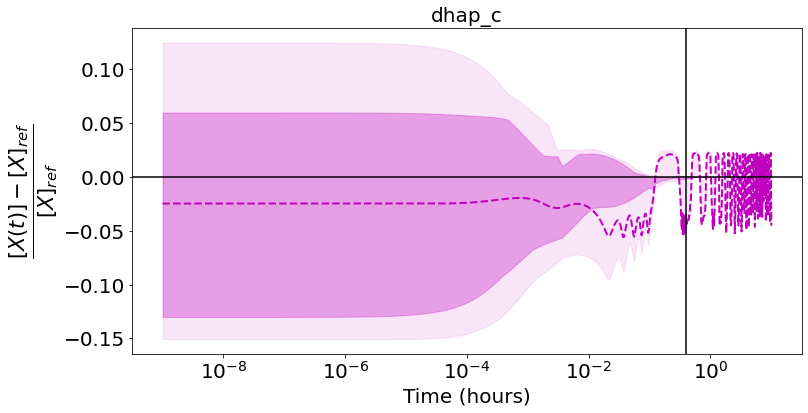

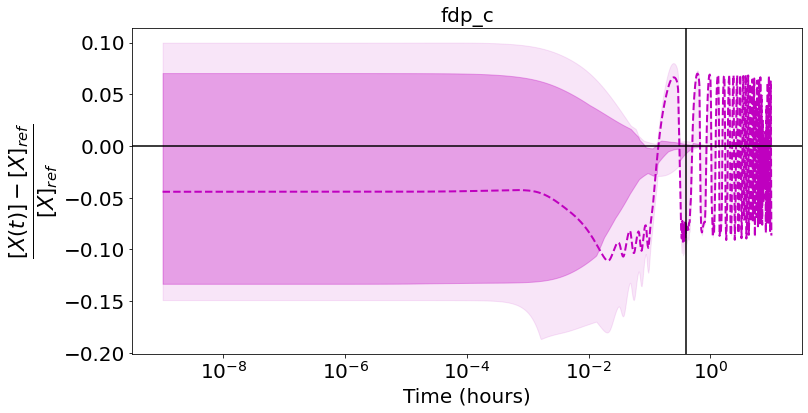

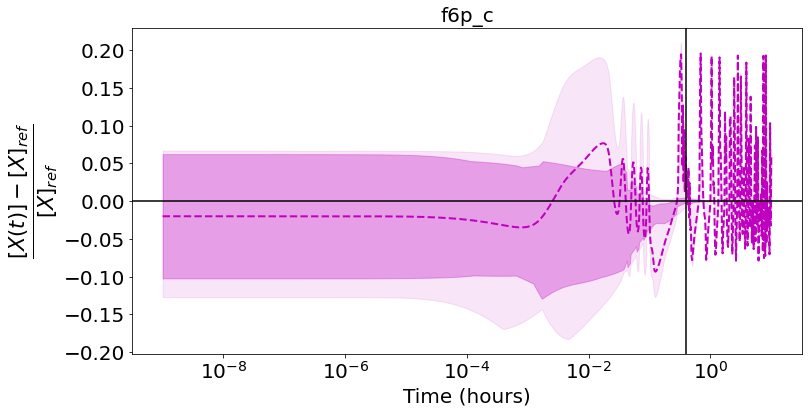

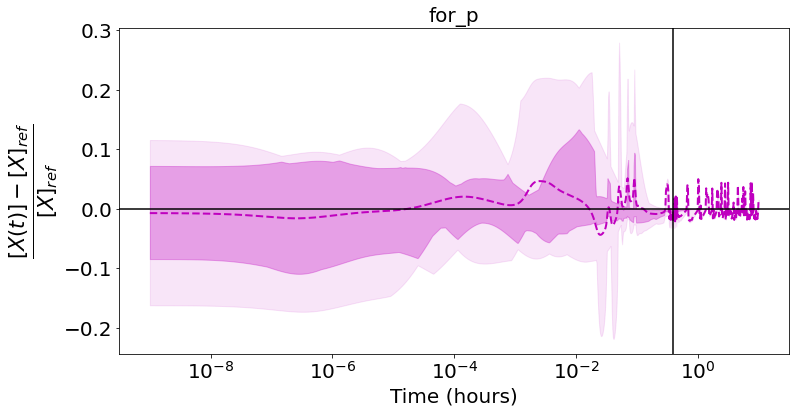

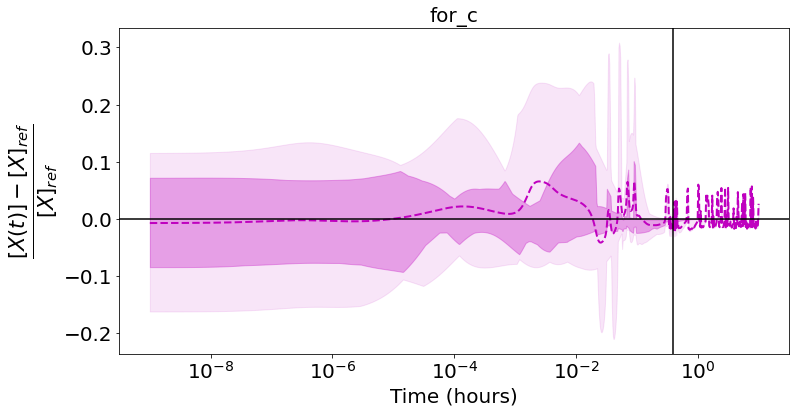

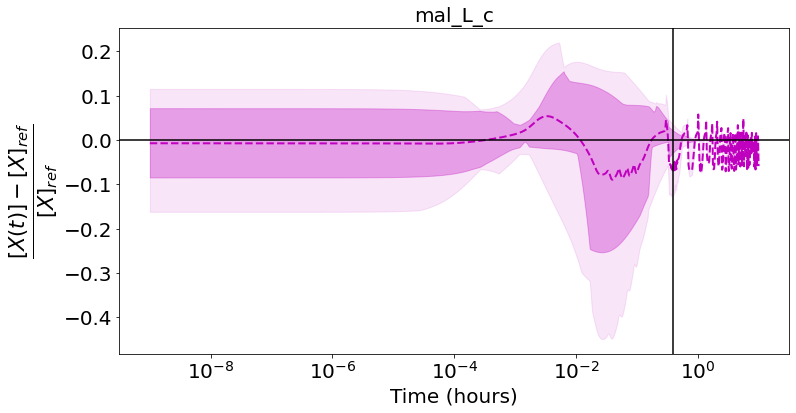

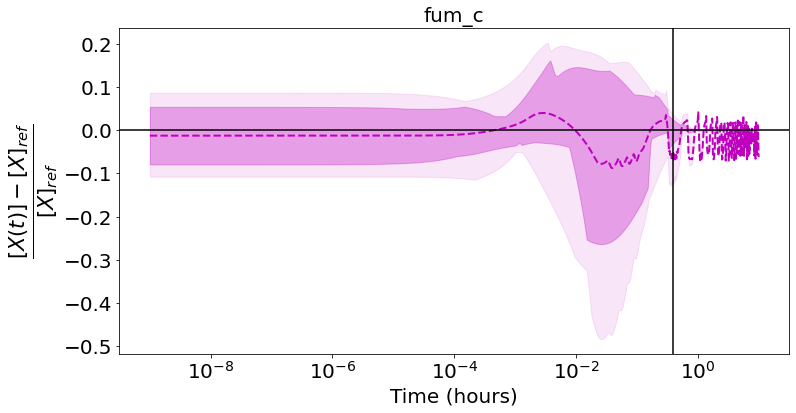

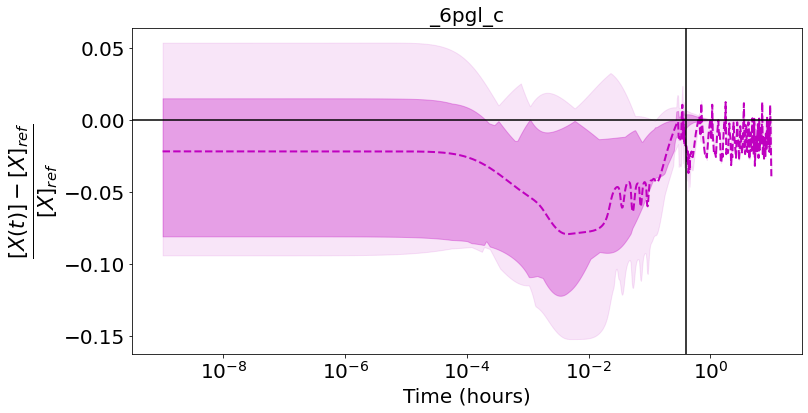

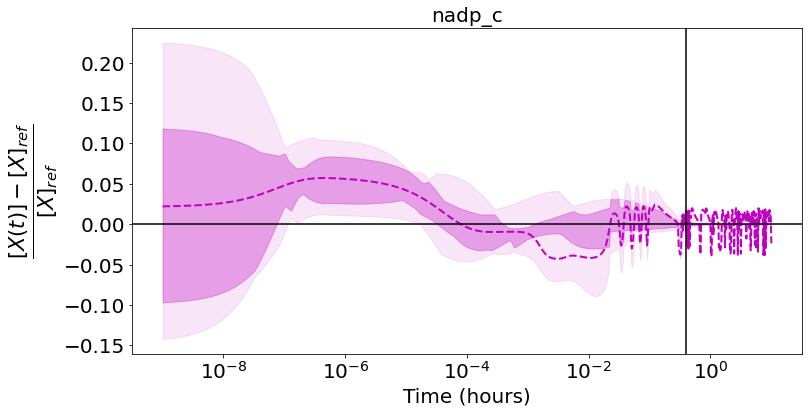

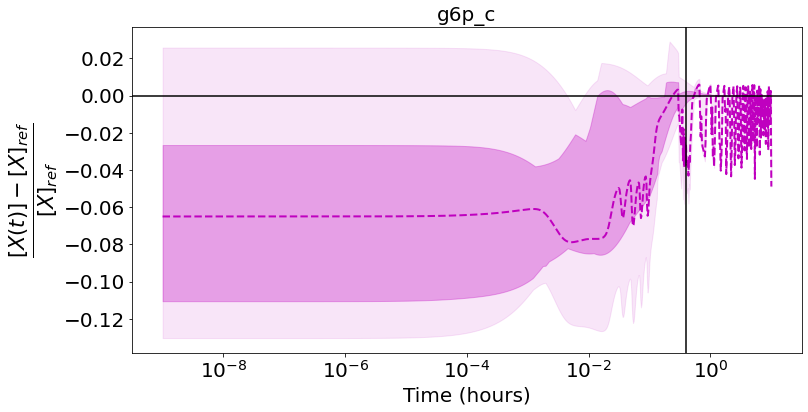

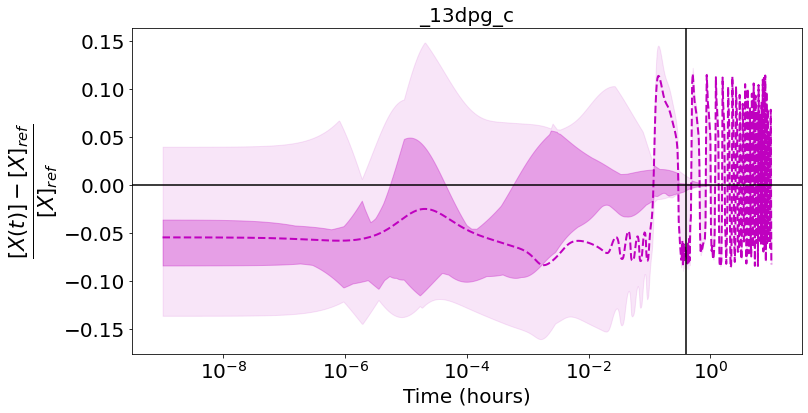

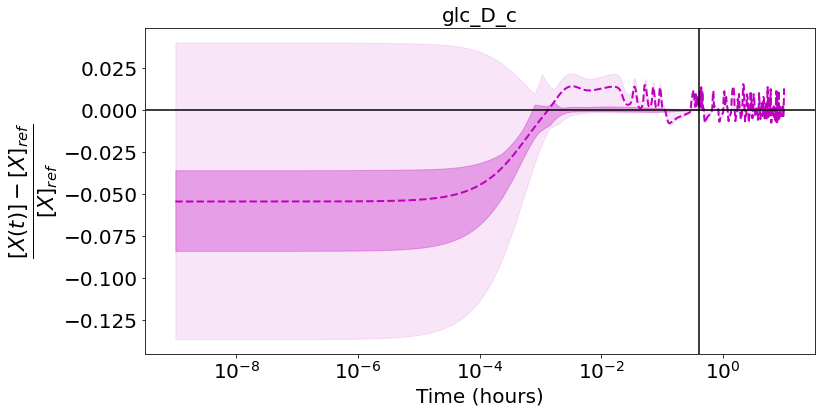

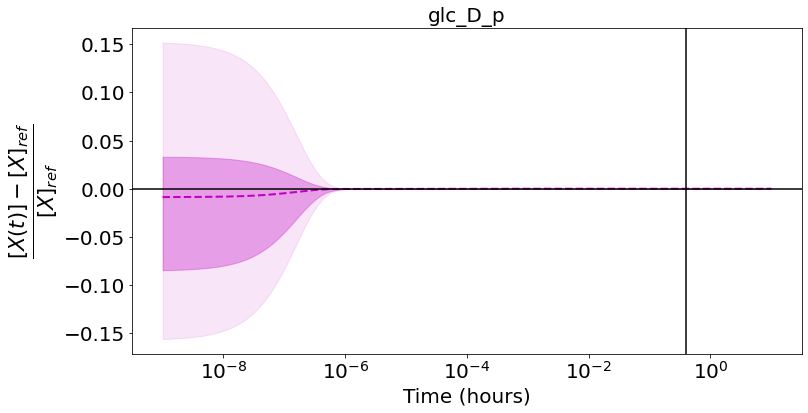

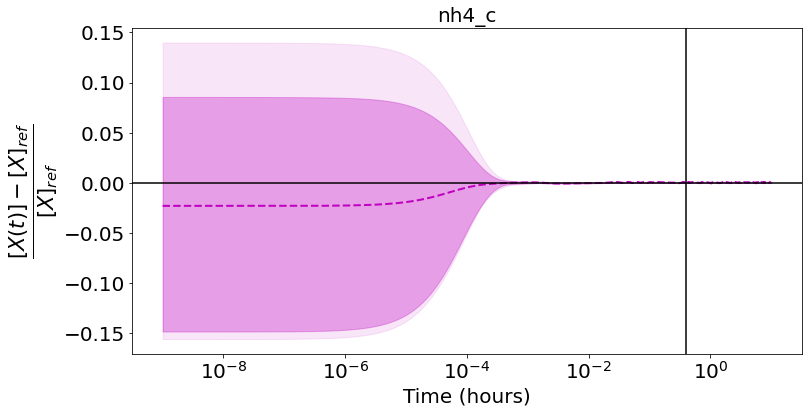

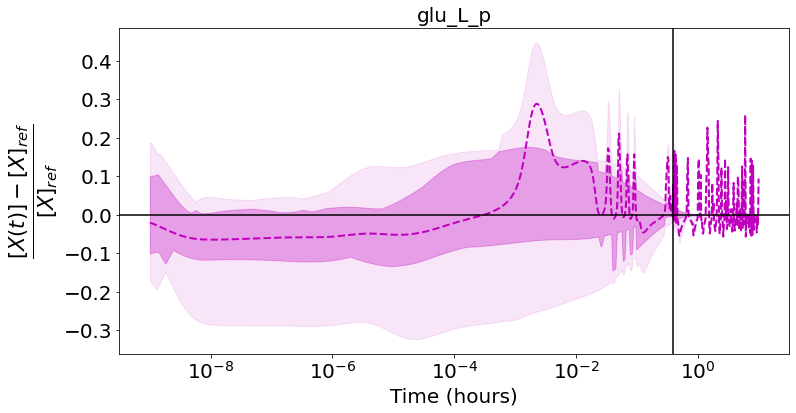

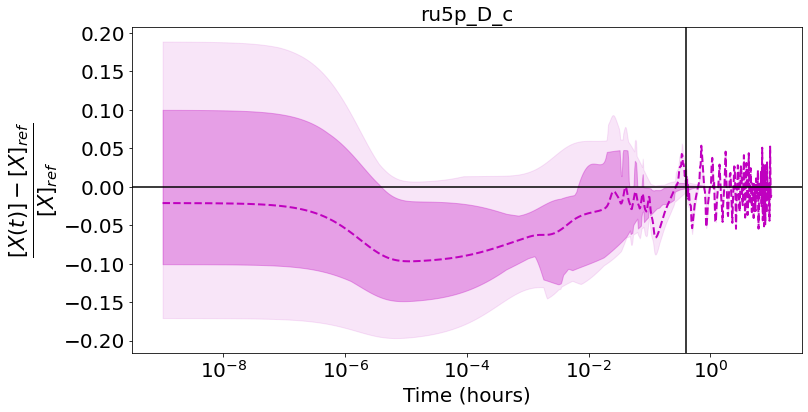

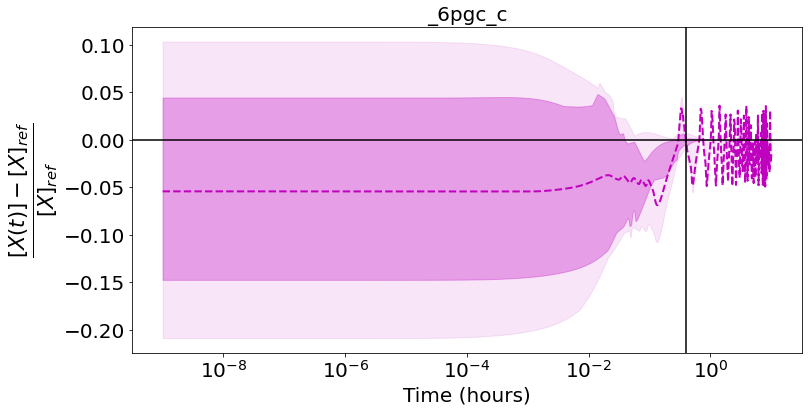

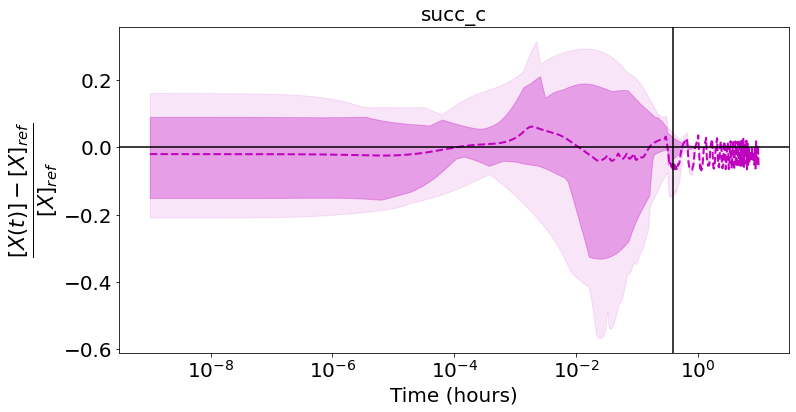

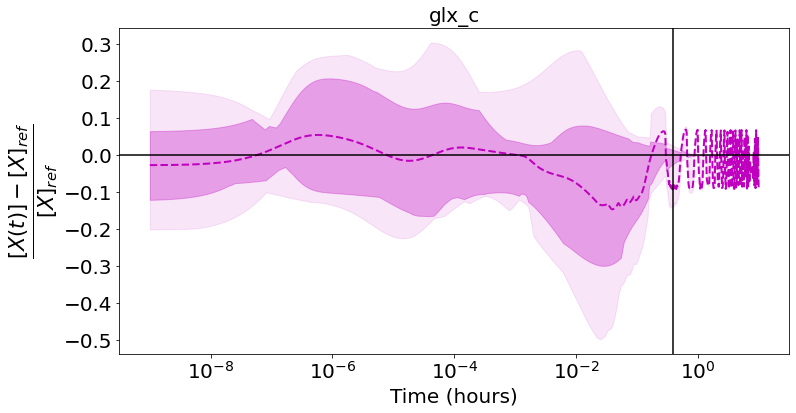

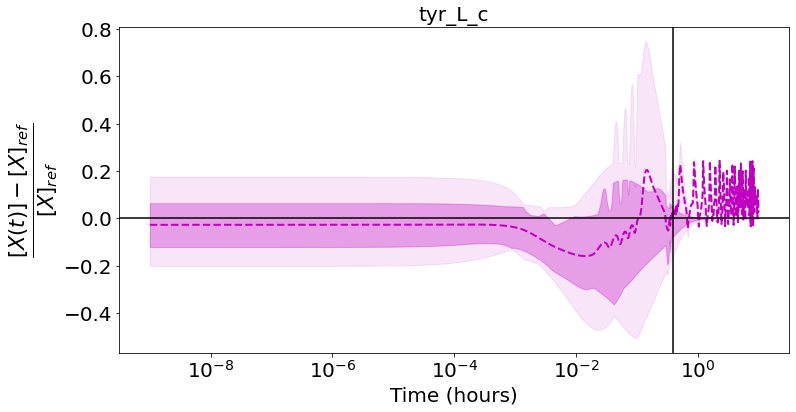

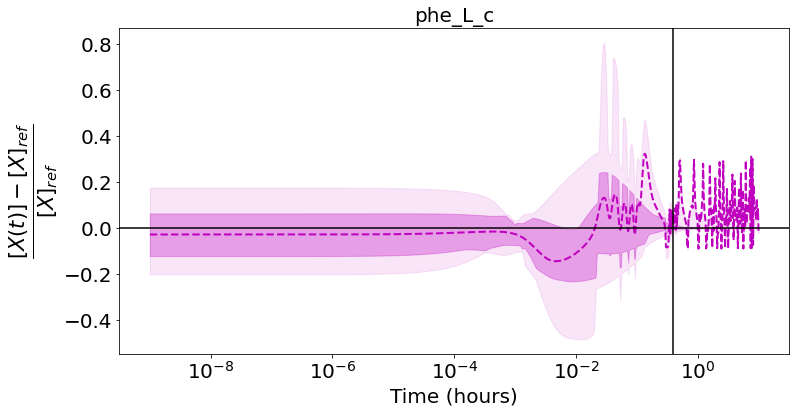

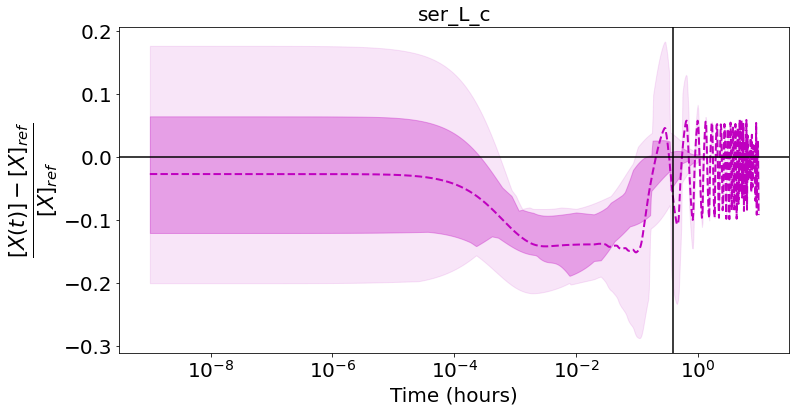

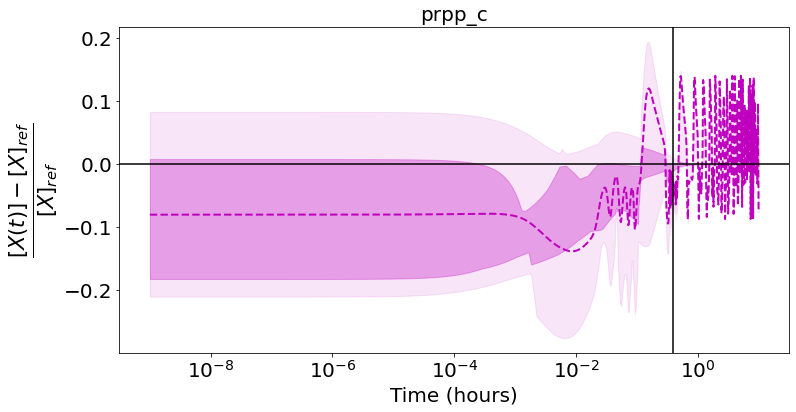

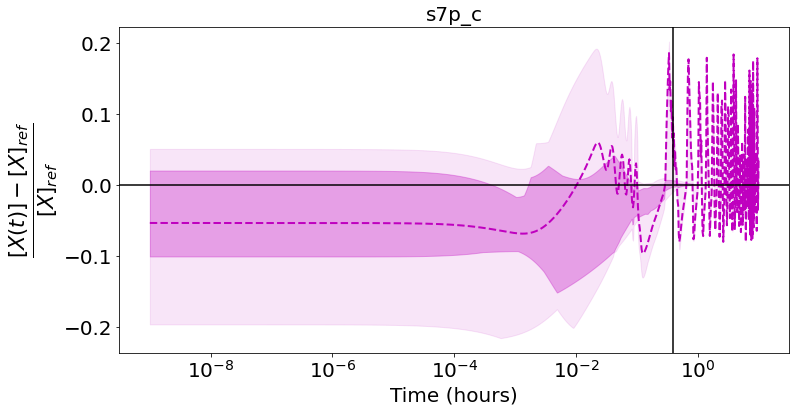

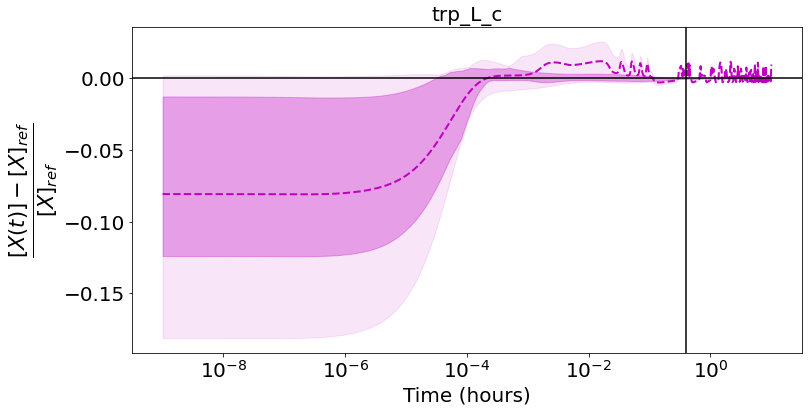

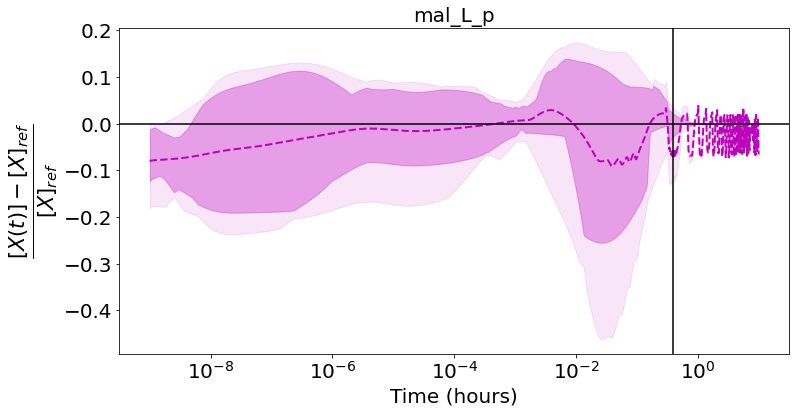

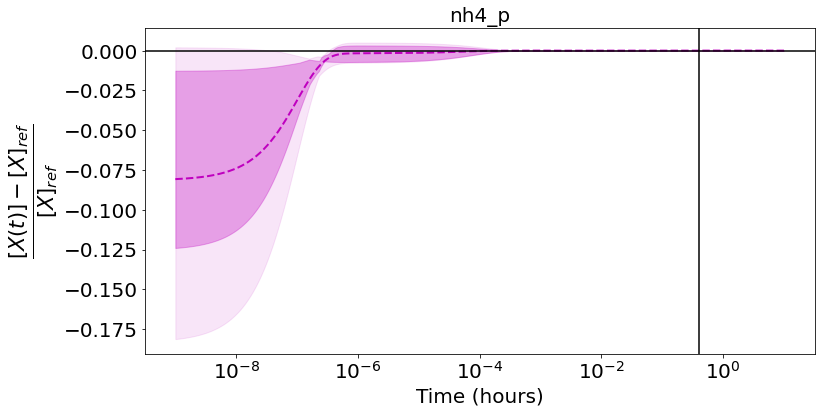

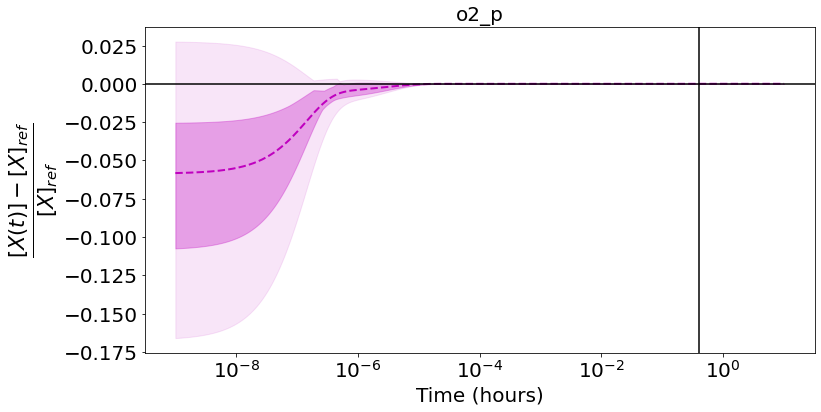

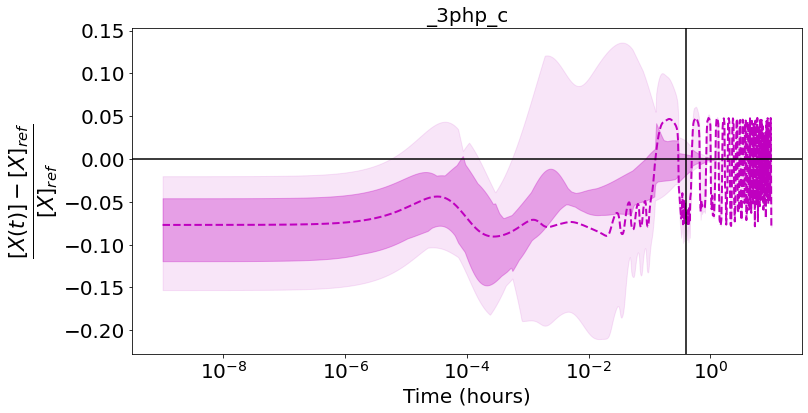

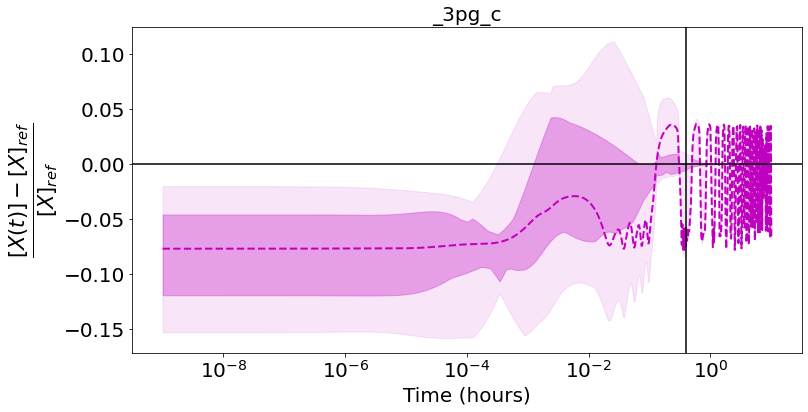

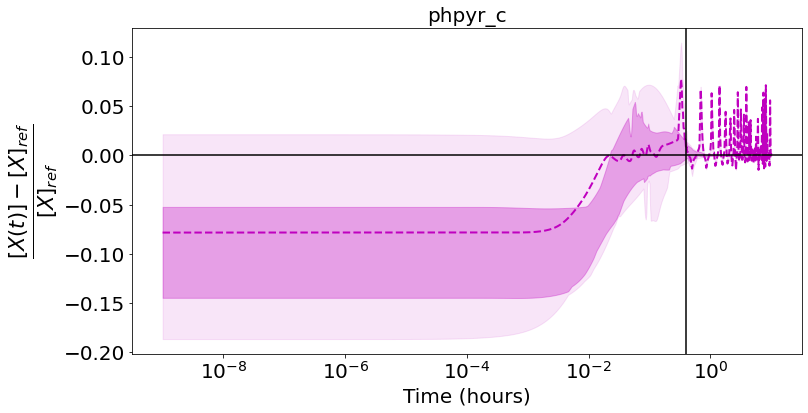

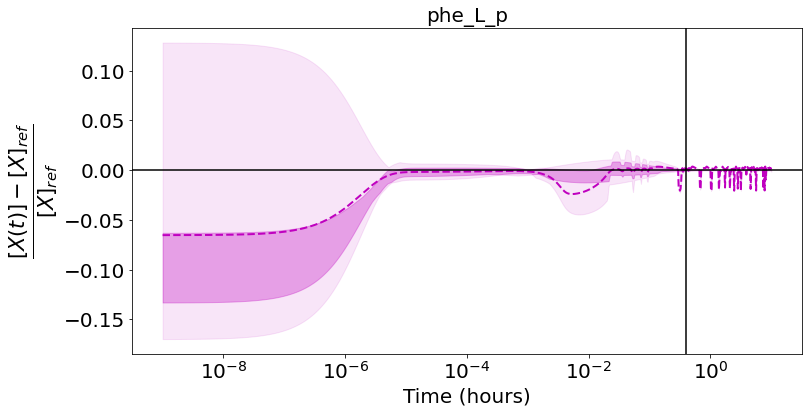

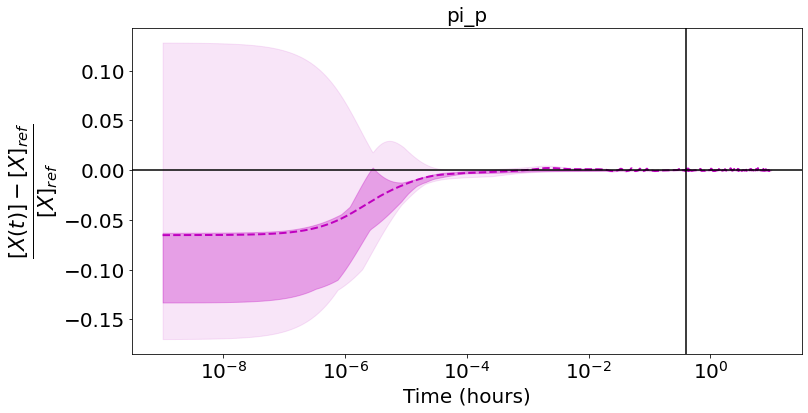

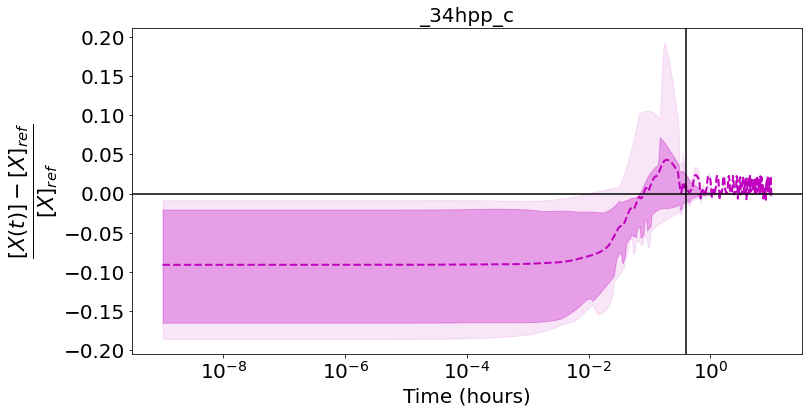

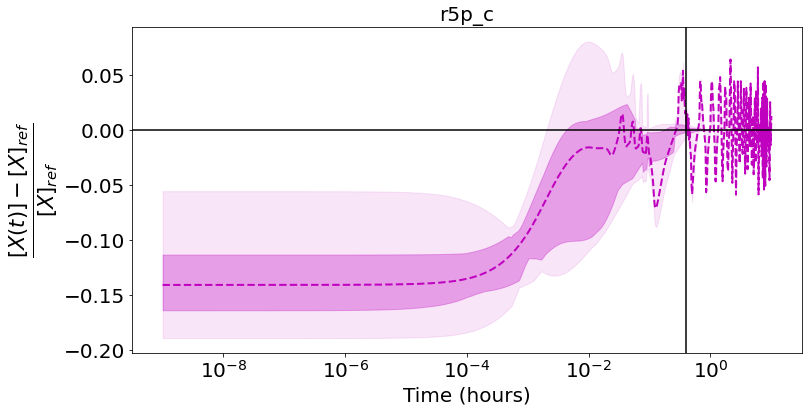

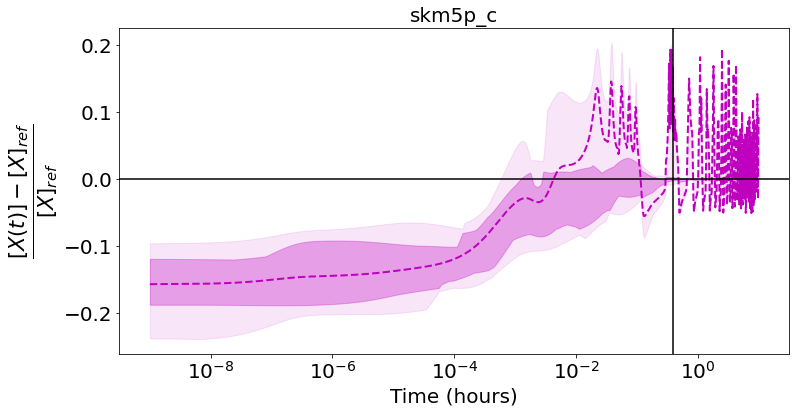

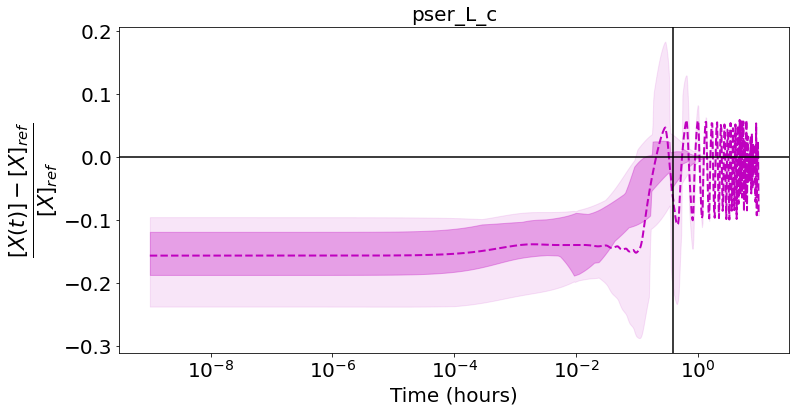

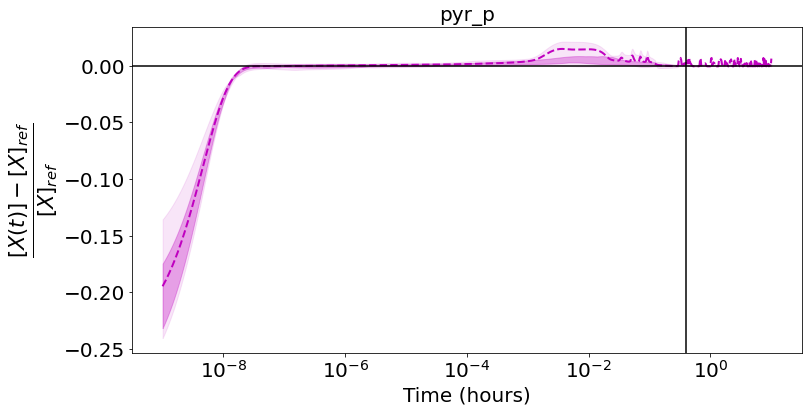

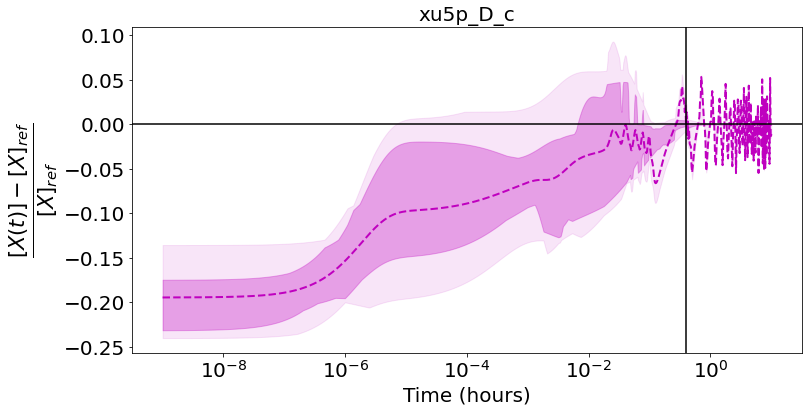

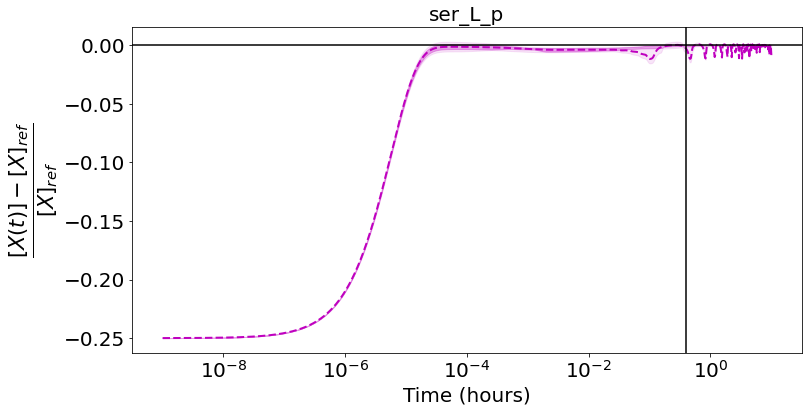

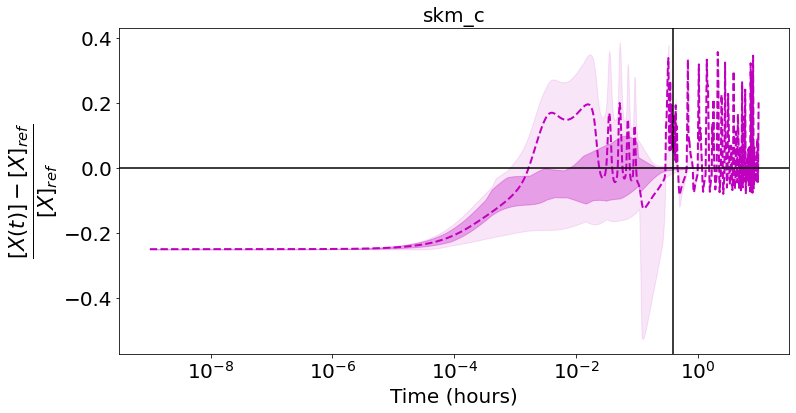

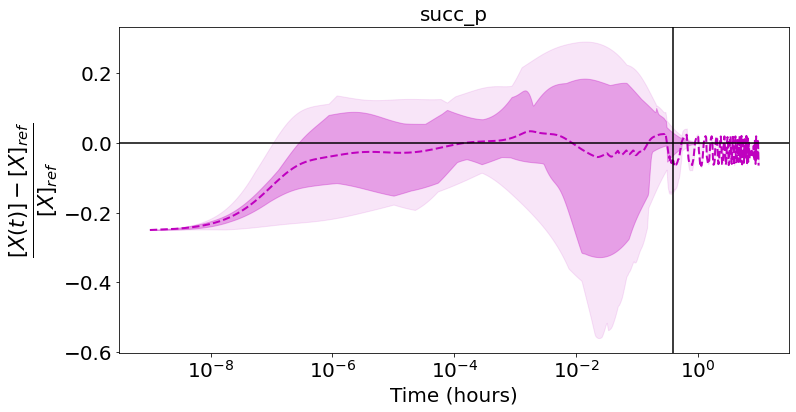

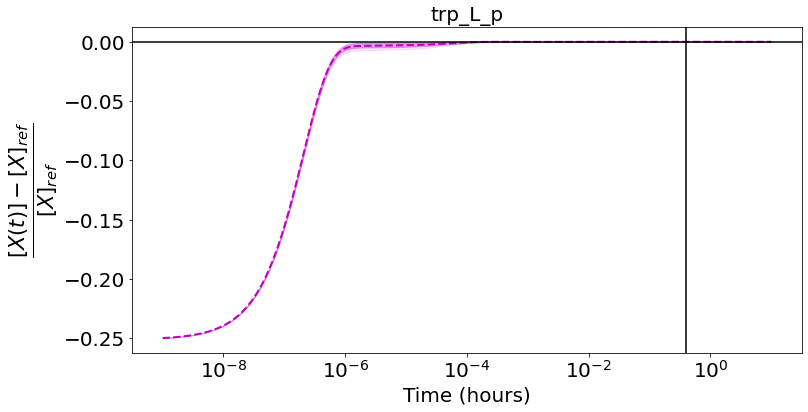

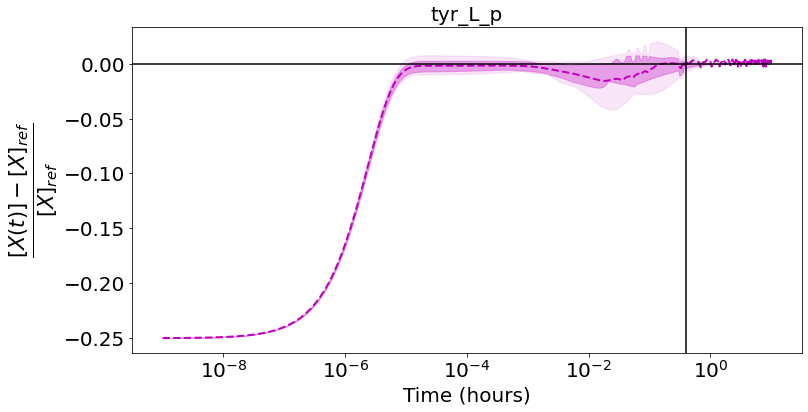

In [72]:
cnt = 0
for key in fluxes.keys()[3:]:
    all_biomass = []
    cnt+=1
    for idx in range(n_sets):   
        sol = pd.read_csv(f'{path_to_folder}solution_{idx}.csv')
        this_conc = sol[key].values
        all_biomass.append(this_conc)
    all_biomass =np.array(all_biomass)
    
    plt.figure(figsize = (12,6))
    plt.plot(np.logspace(-9, 1, 1000), np.mean(all_biomass, axis = 0), color = 'm', ls = '--', lw = 2)
    
    plt.fill_between(np.logspace(-9, 1, 1000),
                     np.percentile(all_biomass,10, axis = 0),
                     np.percentile(all_biomass,90, axis = 0), color= 'm', alpha = 0.1)
    plt.fill_between(np.logspace(-9, 1, 1000),
                     np.percentile(all_biomass,25, axis = 0),
                     np.percentile(all_biomass,75, axis = 0), color= 'm', alpha = 0.3)
    plt.axvline(x = 24/60, color = 'k')
    plt.axhline(y = ref_flux, color = 'k')
    plt.title(f'{key}', fontsize = 20)
    plt.xscale('log')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel('Time (hours)', fontsize = 20)
    plt.ylabel(r'$\frac{[X(t)]-[X]_{ref}}{[X]_{ref}}$', fontsize = 30)
    plt.show()

## Plot bioreactor simulations

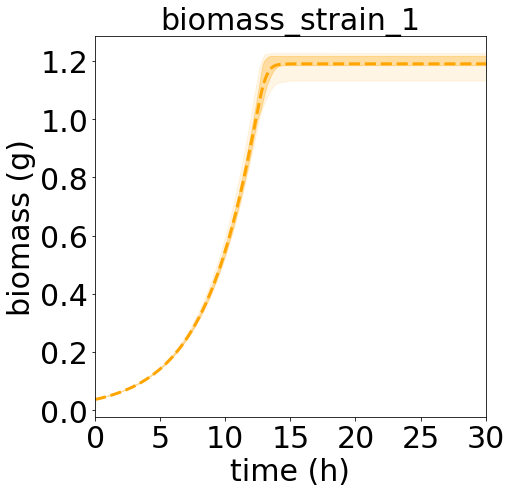

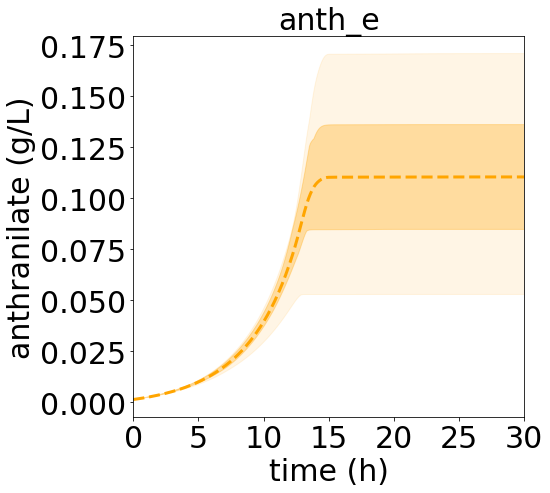

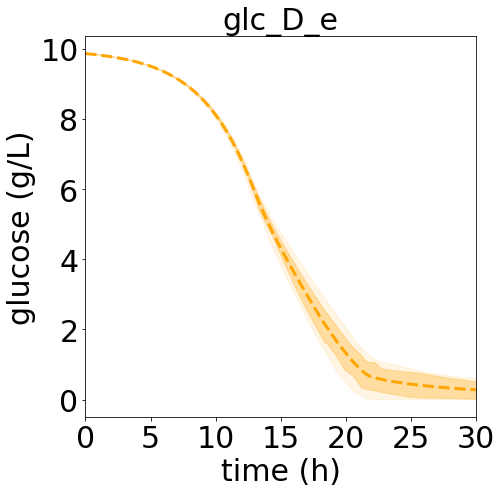

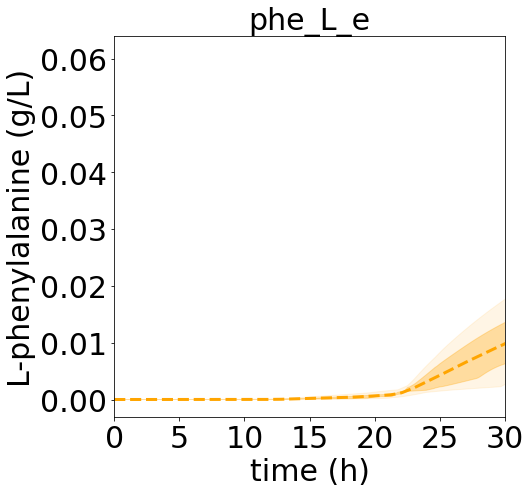

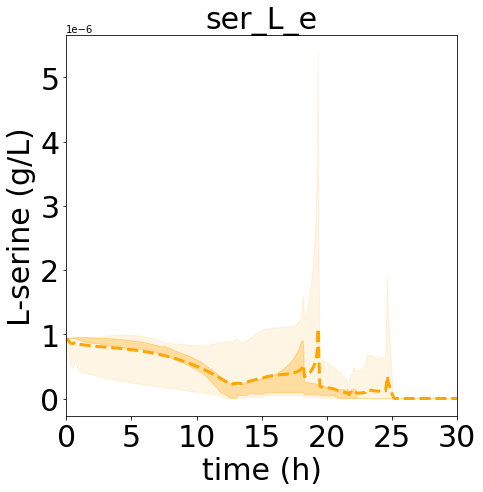

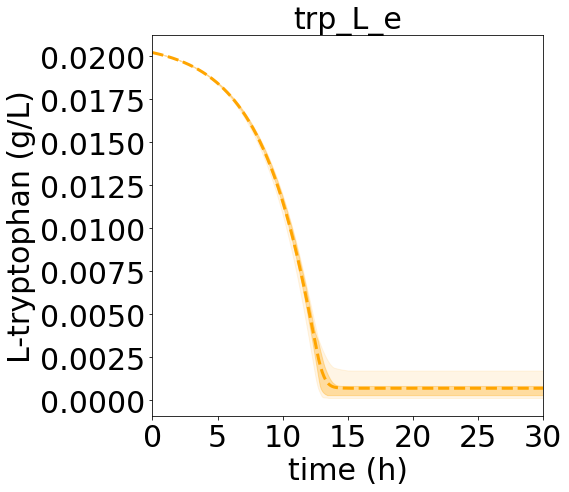

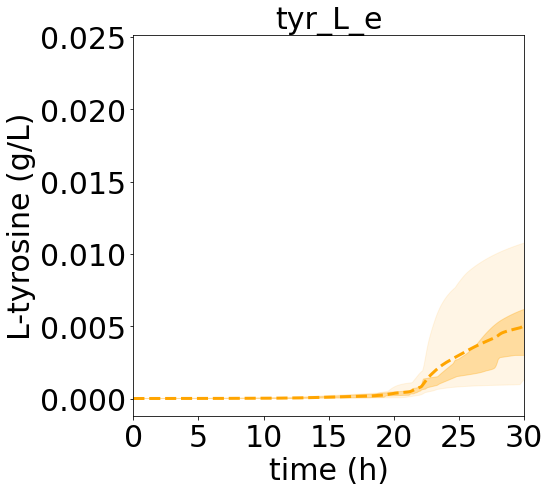

In [75]:
path_to_solutions = f'output/toy_data/bioreactor_simulations/gen_x_parameters/solutions.csv'
solutions = pd.read_csv(path_to_solutions)

# Plotting parameters
TOTAL_TIME = 60
N_STEPS = 1000
N_SETS = 10
rnd_idx = np.random.randint(3000,size = 1000)

labels = {'biomass_strain_1': 'biomass (g)',
          'anth_e': 'anthranilate (g/L)',
          'glc_D_e': 'glucose (g/L)',
          'phe_L_e': 'L-phenylalanine (g/L)',
          'ser_L_e': 'L-serine (g/L)',
          'trp_L_e': 'L-tryptophan (g/L)',
          'tyr_L_e': 'L-tyrosine (g/L)',
          }
dict_scaling = {'biomass_strain_1': 0.28e-12/0.05,
                'anth_e': 136.13 * 1e-6,
                'glc_D_e': 1e-6 * 180.156,
                'phe_L_e': 1e-6 * 165.19 ,
                'ser_L_e': 1e-6 * 105.09 ,
                'trp_L_e': 1e-6 * 204.22 ,
                'tyr_L_e': 1e-6 * 181.19 }

sol_all = solutions
for conc, scaling in dict_scaling.items():
    
    plt.figure(figsize = (7,7))
    all_concs = []
    for id_ in range(N_SETS):    
        
        sol_id = np.where(sol_all['solution_id']==id_)[0]
        this_time = sol_all['time'][sol_id]
        if len(this_time)==1000:
            all_concs.append(sol_all[conc][sol_id])
            
    plot_time = np.linspace(0,70,1000)
    all_concs = np.array(all_concs)*scaling
    plt.plot(plot_time, np.mean(all_concs, axis=0) , color = 'orange', ls = '--', lw = 3)
    
    plt.fill_between(plot_time,
                     np.percentile(all_concs,5, axis = 0),
                     np.percentile(all_concs,95, axis = 0), color= 'orange', alpha = 0.1)
    plt.fill_between(plot_time,
                     np.percentile(all_concs,25, axis = 0),
                     np.percentile(all_concs,75, axis = 0), color= 'orange', alpha = 0.3)

    #plt.legend()
    plt.xlabel('time (h)', fontsize = 30)
    plt.ylabel(labels[conc], fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.title(f'{conc}', fontsize = 30)
    plt.xlim([0, 30])
    #plt.savefig(f'{conc}.svg', dpi = 300, transparent = False, bbox_inches = 'tight')
    plt.show()
    plt.close()